In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns


In [15]:
def evaluate(true, pred):
    accuracy = accuracy_score(true, pred)
    precision = precision_score(true, pred)
    recall = recall_score(true, pred)
    f1 = f1_score(true, pred)
    print('Accuracy: %s' % accuracy)
    print('Recall: %s' % recall)
    print('Precision: %s' % precision)
    print('F1: %s' % f1)
    cm = confusion_matrix(true, pred)
    sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()




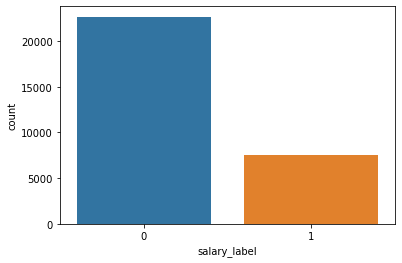

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'salary', 'age_cat', 'capital-gain_cat',
       'capital-loss_cat', 'hours-per-week_cat', 'workclass_cat',
       'education_cat', 'marital-status_cat', 'occupation_cat',
       'relationship_cat', 'race_cat', 'sex_cat', 'native-country_cat',
       'salary_label'],
      dtype='object')

In [16]:
df = pd.read_csv(r'C:\Users\rfrancu\Projects\eda\data\processed_train.csv')
df_test = pd.read_csv(r'C:\Users\rfrancu\Projects\eda\data\processed_test.csv')
# Distribution of the target variable
sns.countplot(x='salary_label', data=df)
plt.show()

df.columns

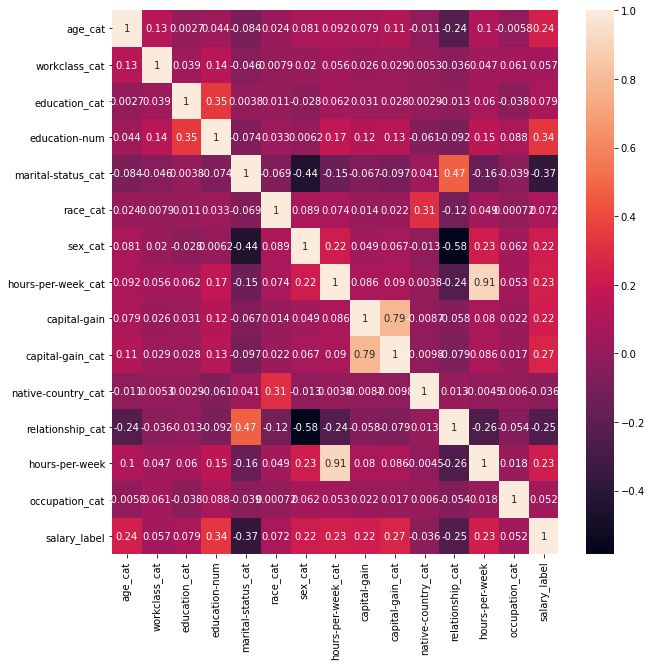

In [17]:

# make a selection on features and compute the correlation matrix
# V1
FEATURE_COLUMN = ['age_cat', 'workclass_cat', 'education_cat', 'education-num', 'marital-status_cat', 'race_cat', 
                  'sex_cat', 'hours-per-week_cat', 'capital-gain', 'capital-gain_cat', 'native-country_cat', 
                  'relationship_cat', 'hours-per-week', 'occupation_cat']

# V2, after feature selection based on model coeficients
# FEATURE_COLUMN = ['capital-gain', 'marital-status_cat', 'education-num', 'age_cat',
#                   'hours-per-week', 'sex_cat', 'race_cat', 'workclass_cat']

# V3, after feature selection based on tree solution
# FEATURE_COLUMN = ['capital-gain_cat', 'hours-per-week_cat','education-num', 'age_cat', 
#                   'relationship_cat', 'marital-status_cat', 'workclass_cat', 'native-country_cat']
TARGET_COLUMN = ['salary_label']

df = df[FEATURE_COLUMN + TARGET_COLUMN]
df_test = df_test[FEATURE_COLUMN + TARGET_COLUMN]
corr_matrix = df.corr()
fig, axs = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, ax=axs)
plt.show()

In [5]:
X = df[FEATURE_COLUMN]
y = df[TARGET_COLUMN]
X_test = df_test[FEATURE_COLUMN]
y_test = df_test[TARGET_COLUMN]

scaler = StandardScaler()
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, test_size=0.15)
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

c:\Users\rfrancu\Miniconda3\envs\matting\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8346961325966851
Recall: 0.5062166962699822
Precision: 0.7480314960629921
F1: 0.6038135593220338


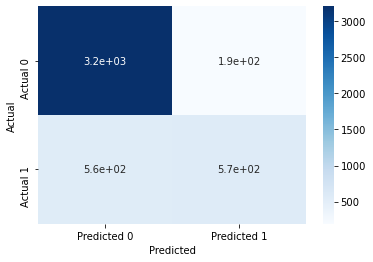

Accuracy: 0.8306772908366534
Recall: 0.5227027027027027
Precision: 0.7115526122148639
F1: 0.602679962605173


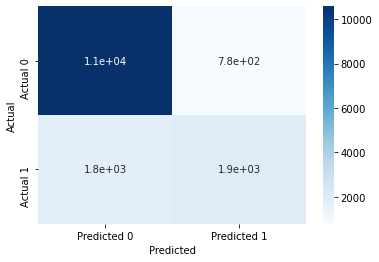

In [6]:
# define model
model = LogisticRegression(random_state=42, max_iter=1000)
# fit it
model.fit(X_train_scaled, y_train)
# test
y_pred = model.predict(X_valid_scaled)
y_test_pred = model.predict(X_test_scaled)
# performance
evaluate(y_valid, y_pred)
evaluate(y_test, y_test_pred)

c:\Users\rfrancu\Miniconda3\envs\matting\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7975690607734807
Recall: 0.8161634103019538
Precision: 0.5644963144963145
F1: 0.6673928830791576


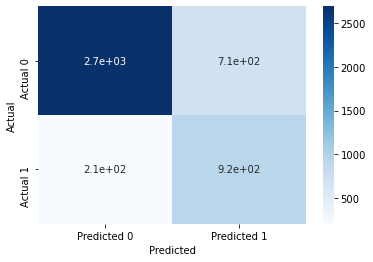

Accuracy: 0.7848605577689243
Recall: 0.8243243243243243
Precision: 0.5407801418439716
F1: 0.6531049250535331


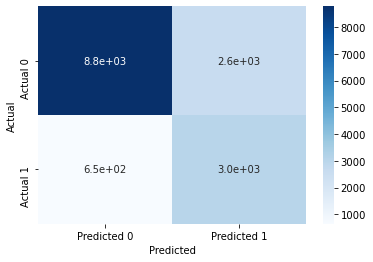

In [9]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)


# Train a logistic regression model on the oversampled data
model = LogisticRegression()
model.fit(X_train_sm, y_train_sm)

# Make predictions on the test data
y_pred = model.predict(X_valid_scaled)
y_test_pred = model.predict(X_test_scaled)

evaluate(y_valid, y_pred)
evaluate(y_test, y_test_pred)

In [30]:
# Get feature importance based on model coeficients

coefficients = model.coef_

# Create a dataframe of the feature importance
feature_importance = pd.DataFrame(coefficients[0], X_train.columns, columns=['importance'])
feature_importance['importance'] = feature_importance['importance'].abs()
feature_importance.sort_values(by='importance', ascending=False, inplace=True)

# Print the top 10 most important features
print(feature_importance.head(12))

                    importance
capital-gain          6.172100
capital-gain_cat      1.124622
marital-status_cat    1.117903
education-num         0.922702
age_cat               0.687463
hours-per-week        0.444268
sex_cat               0.160212
race_cat              0.145431
workclass_cat         0.122334
relationship_cat      0.102796
fnlwgt                0.073710
native-country_cat    0.052052


In [13]:
# HyperParameter tuning and cross-validation

# Define the hyperparameters and their possible values
parameters = {
    'C':[0.01,0.1,1,10], 
    'penalty':['l1','l2', 'elasticnet'], 
    'solver': ['liblinear', 'lbfgs']
    }

# Define the logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Define the cross-validation method
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Create a GridSearchCV object
clf = GridSearchCV(log_reg, parameters, cv=cv, scoring='f1')

# Fit the GridSearchCV object to the data
clf.fit(X_train_sm, y_train_sm)

# Print the best hyperparameters
print("Best Hyperparameters : " + str(clf.best_params_))

c:\Users\rfrancu\Miniconda3\envs\matting\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rfrancu\Miniconda3\envs\matting\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rfrancu\Miniconda3\envs\matting\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rfrancu\Miniconda3\envs\matting\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d arr

Best Hyperparameters : {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


c:\Users\rfrancu\Miniconda3\envs\matting\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7951381215469613
Recall: 0.8161634103019538
Precision: 0.5607077486272117
F1: 0.6647377938517179


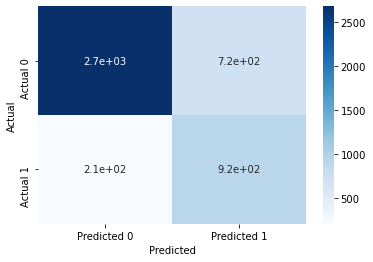

Accuracy: 0.7847941567065073
Recall: 0.8294594594594594
Precision: 0.5404120443740095
F1: 0.6544407719373067


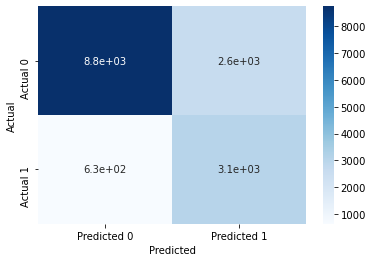

In [12]:
# Perform classification using best found parameters
config = {
    'random_state': 42,
    'C': 0.01,
    'solver': 'liblinear',
    'penalty': 'l1',
    'max_iter': 1000
}

# define model
model = LogisticRegression(**config)
# fit it
model.fit(X_train_sm, y_train_sm)
# test
y_pred = model.predict(X_valid_scaled)
y_test_pred = model.predict(X_test_scaled)
# performance
evaluate(y_valid, y_pred)
evaluate(y_test, y_test_pred)

c:\Users\rfrancu\Miniconda3\envs\matting\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7922651933701658
Precision: 0.5553571428571429
Recall: 0.8285968028419183
F1: 0.6650035637918745


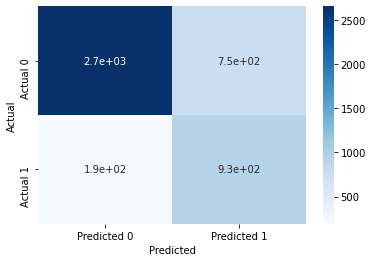

Accuracy: 0.7841965471447543
Precision: 0.5397807637906648
Recall: 0.8251351351351351
F1: 0.65262932877298


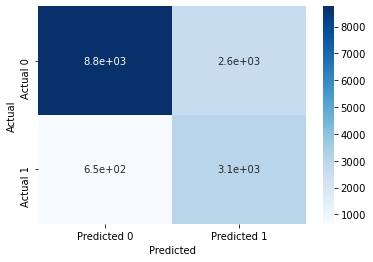

In [61]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)


# Train a logistic regression model on the oversampled data
log_reg = LogisticRegression()
log_reg.fit(X_train_sm, y_train_sm)

# Make predictions on the test data
y_pred = log_reg.predict(X_valid_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

evaluate(y_valid, y_pred)
evaluate(y_test, y_test_pred)



In [14]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Make predictions using the random forest classifier
y_pred = rfc.predict(X_test)

C:\Users\rfrancu\AppData\Local\Temp/ipykernel_19968/2906621645.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


In [15]:
from sklearn.ensemble import VotingClassifier

#Initialize the classifiers
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()

#Create the ensemble model
ensemble = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2)], voting='hard')

#Fit the ensemble model on training data
ensemble.fit(X_train, y_train)

#Make predictions on test data
y_pred = ensemble.predict(X_test)
print(f1_score(y_pred, y_test))

c:\Users\rfrancu\Miniconda3\envs\matting\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rfrancu\Miniconda3\envs\matting\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5616973757677276


In [16]:
from imblearn.under_sampling import NearMiss

# Create the undersampler object
undersampler = NearMiss()

# Fit and transform the training data
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# Train a logistic regression model on the undersampled data
log_reg = LogisticRegression()
log_reg.fit(X_train_undersampled, y_train_undersampled)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)
print(f1_score(y_pred, y_test))

0.6168534661685346


c:\Users\rfrancu\Miniconda3\envs\matting\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes). It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.